<a href="https://colab.research.google.com/github/anaramos5582/bootcamp-womakerscode/blob/main/Desafio_testeHipoteses_AnaPaulaBarrosRamos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Individual - Data Analytics Womarkerscode - Semana 14
## Estatística - Testes de Hipóteses
## By Ana Paula Barros Ramos

### *Insights*:


1.   Base de Dados Experimento_TesteAB:

*   **Questão 1**: O cenário B possui maior taxa de conversão.

*   **Questão 2**: O tamanho da amostra necessária para o desenvolvimento de um teste A/B atendendo os critérios enunciados é de 15236.

2.   Base de Dados Pacientes:

*   **Questão 3**: pudemos confirmar de diferentes maneiras que as idades dos pacientes não seguem uma distribuição normal.

  Considerando que os dados não seguem uma distribuição normal seria portanto desaconselhável usar testes estatísticos paramétricos, pois esses testes assumem a normalidade dos dados, e ao quebrar a regra deveríamos utilizar um teste não-paramétrico.

  No entanto, como estamos tratando de dados fictícios e uma amostra pequena utilizeramos um teste t uniparamétrico, de modo a comparar a média amostral à média hipotética de 50 anos.

*   **Questão 4**: Através da análise exploratória dos dados assumimos que se trata de amostras independentes, onde assumimos que o index dos dados analisados corresponde a um novo paciente, tendo em vista que embora haja uma diferença sutil no quantitativo geral de registros entre cada amostra, há diferenças nas observações gêneros e etnia, por exemplo.

*   **Questão 5**: Consideramos que já vimos acima que a distribuição das pressões arteriais seguem uma distribuição normal e tratamos de uma amostra pequena
além das amostras serem independentes, testamos a variabilidade entre as amostras, através do teste F de Levene, para sabermos o parâmetro correto para utilizaremos no teste T. E através do ttest_ind assumimos que a pressão arterial média para pacientes cardíacos é igual à pressão arterial média para pacientes saudáveis.

*   **Questão 6**: De modo a atender os pressupostos para utilização da ANOVA, já cientes da normalidade das distribuições dos dados, testamos a homogeniedade das variâncias entre as amostras (F de Levene), além da pressão arterial ser uma variável contínua  e as observações serem independentes entre os grupos, realizaremos o teste ANOVA. Não rejeitamos a hipótese nula, assumimos que a pressão arterial média é a mesma em todos os grupos étnicos. E tabela do modelo confirma que não há evidências suficientes para rejeitar a hipótese nula e nos mostra a baixa variação entre os grupos étnicos.

  Ainda, a hipótese alternativa do enunciado da questão assume que há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população. No entanto, considerando que a ANOVA de um fator permite apenas determinar se há uma diferença estatisticamente significativa entre as médias de pelo menos dois grupos independentes.

  Assim, se caso houvesse diferença significativa entre os grupos, para sabermos quais grupos diferem entre si, se faz necessário utilizar um teste de comparações múltiplas, a exemplo do teste de Tukey, considerando que os dados atendem os pressupostos para a utilização do teste: os grupos são normalmente distribuídos, as variâncias são constantes e as observações são independentes. Foi decidido utilizar o teste Tukey apenas para uma exploração, através das funções pairwise_tukeyhsd e esploração gráfica através da função plot_simultaneous(). Assim, Observamos que o p_valor de todos os pares de grupos é maior que alpha (0.05), momento em que não rejeitamos a hipótese nula.

  Na tabela ao analisarmos o intervalo de confiança (lower-upper) para as diferença entre os pares de grupos, podemos observar que o valor 0 está contido em todos eles, concluindo que a pressão arterial média dos pacientes dos diferentes pares de grupos são significativamente as mesmas. Além de graficamente visualizarmos que os intervalos de confiança dos grupos se sobrepõem, indicando similaridade estatística entre os grupos.

*   **Questão 7**: seguindo a hipótese nula padrão para o teste qui-quadrado de independência realizado pelo método chi2_contingency(), de que não há associação entre as variáveis, não rejeitamos a hipótese nula, de modo a assumir que não existe uma associação significativa entre as variáveis genêro e condições de saúde adicionais.

*   **Questão 8**: Não rejeitamos a hipótese nula. Não existe uma associação significativa entre a idade do paciente e sua pressão arterial.

*   **Questão 9**: Com 95% de confiança, o intervalo de confiança para a média das pressões arterias entre os pacientes com condições de saúde adicionais está entre: 149.22 e 151.01.

*   **Questão 10**: Através das análises gráficas (histograma e qq-plot) é possível assumir que os valores das pressões arteriais da população seguem uma distribuição normal.

In [ ]:
# Importando as bibliotecas

# Manipulação de arquivos
from google.colab import files

# Manipulação de dados
import pandas as pd
import numpy as np

# Análises Estatísticas
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import ttest_ind, t
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import ttest_1samp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import spearmanr
from statsmodels.formula.api import ols

# Análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
files.upload()
df = pd.read_csv('experimento_teste_ab.csv')

Saving experimento_teste_ab.csv to experimento_teste_ab.csv


In [ ]:
df.head(30)

,Visitante_ID,Versão_Página,Visualizações,Conversões
0,1,A,167,1
1,2,A,160,0
2,3,A,170,0
3,4,A,161,1
4,5,A,104,0
5,6,A,104,0
6,7,A,163,1
7,8,A,119,1
8,9,A,186,0
9,10,A,191,1


In [ ]:
df.shape

(2000, 4)

## Questão 1:

Qual dos cenários tem a maior taxa de conversão?

In [ ]:
# Cenário A
dfA = df[df['Versão_Página'] == 'A']
dfA.shape

(1000, 4)

In [ ]:
# Cenário B
dfB = df[df['Versão_Página'] == 'B']
dfB.shape

(1000, 4)

In [ ]:
taxaA = (dfA['Conversões'].sum() / dfA['Visualizações'].sum()) * 100
taxaA

0.06961249046971857

In [ ]:
taxaB = (dfB['Conversões'].sum() / dfB['Visualizações'].sum()) * 100
taxaB

0.08295946268815206

In [ ]:
print('A taxa de conversão do cenário A é de {:.2f}%.'.format(taxaA))
print('A taxa de conversão do cenário B é de {:.2f}%.'.format(taxaB))

A taxa de conversão do cenário A é de 0.07%.
A taxa de conversão do cenário B é de 0.08%.


## Questão 2:

Calcule qual o tamanho da amostra necessária para o desenvolvimento de um teste A/B, seguindo os seguintes critérios:

  a. O cenário A, da base, como o inicial, que funciona hoje.

  b. Considere 95% de confiança de que o efeito na conversão não foi aleatório com um nível de significância de 5% (alpha = 0,05).

  c. Também considere 80% de certeza conseguir capturar o efeito da nova abordagem.
  
  d. O aumento para 10% de conversão.





In [ ]:
dfA.describe()

,Visitante_ID,Visualizações,Conversões
count,1000.000000,1000.000000,1000.000000
mean,500.500000,150.835000,0.105000
std,288.819436,28.951372,0.306707
min,1.000000,100.000000,0.000000
25%,250.750000,126.000000,0.000000
50%,500.500000,152.000000,0.000000
75%,750.250000,176.000000,0.000000
max,1000.000000,199.000000,1.000000


In [ ]:
# Calculando Z-score para 95% de confiança
alpha = 0.05
z95 = stats.norm.ppf(1-alpha/2)
z95

1.959963984540054

In [ ]:
# Calculando Z-score para 80 % de poder do teste
beta = 0.20
z80 = stats.norm.ppf(1-beta)
z80

0.8416212335729143

In [ ]:
taxaA_atual = (dfA['Conversões'].sum() / dfA['Visualizações'].sum())*100
taxaA_atual

0.06961249046971857

In [ ]:
# O enunciado não está claro se a taxa de conversão deve ser de 10% ou o acréscimo de 10% em cima da taxaA_atual
taxaA_desejada = taxaA_atual*(1+0.1)
taxaA_desejada

0.07657373951669043

In [ ]:
# Calculando Delta, quanto falta para alcançar a taxa de conversão desejada
delta = taxaA_desejada - taxaA_atual
delta

0.00696124904697186

In [ ]:
# Calculando a variância do Cenário A
varA = dfA['Conversões'].var()
varA

0.09406906906906906

In [ ]:
print('z95:',z95)
print('z80:',z80)
print('varA:',varA)
print('delta:',delta)

z95: 1.959963984540054
z80: 0.8416212335729143
varA: 0.09406906906906906
delta: 0.00696124904697186


In [ ]:
# Calculando o tamanho da amostra para cada grupo
n = (((z95 + z80)**2) * varA)/ delta**2
print('O tamanho da amostra necessária para o desenvolvimento de um teste A/B atendendo os critérios enunciados é de {:.0f}.'.format(n))

O tamanho da amostra necessária para o desenvolvimento de um teste A/B atendendo os critérios enunciados é de 15236.


Verifique a base pacientes.csv, os dados são fictícios. A sintetiza uma base de dados de um hospital que trata de pacientes com problemas cardíacos. Considere a base como a população, portanto as estatísticas da população são conhecidas. Responda as perguntas abaixo:


In [ ]:
files.upload()
df_pacientes = pd.read_csv('pacientes.csv')

Saving pacientes.csv to pacientes.csv


In [ ]:
df_pacientes.head(20)

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais
5,5,153.134713,66,0,0,0,Masculino,Caucasiano,Saudável
6,6,150.750643,52,1,2,1,Feminino,Hispânico,Com condições de saúde adicionais
7,7,142.339147,63,0,3,0,Masculino,Asiático,Saudável
8,8,148.453423,57,0,0,1,Masculino,Caucasiano,Com condições de saúde adicionais
9,9,135.927802,40,0,2,0,Masculino,Hispânico,Saudável


In [ ]:
df_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   Pressao_Arterial   1000 non-null   float64
 2   Idade              1000 non-null   int64  
 3   Genero             1000 non-null   int64  
 4   Etnia              1000 non-null   int64  
 5   Estado_Saude       1000 non-null   int64  
 6   Nome_Genero        1000 non-null   object 
 7   Nome_Etnia         1000 non-null   object 
 8   Nome_Estado_Saude  1000 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 70.4+ KB


In [ ]:
# Renomeando a coluna de index
df_pacientes.rename(columns={'Unnamed: 0':'Index'}, inplace=True)

## Questão 3:

Considerando uma amostra de 45 números que representam o index do dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697,  89, 280, 232, 756, 358,  36, 439, 768, 967, 699, 473, 222,  89, 639, 883, 558, 757,  84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]). Considerando essa amostra é possível dizer que a idade média das pessoas com problemas cardíacos é maior que 50 anos? Nível de significância igual a 5%.

In [ ]:
lista_indices = [909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]

In [ ]:
len(lista_indices)

45

In [ ]:
# Filtrando os dados pelo índices indicados
df_amostra = df_pacientes[df_pacientes['Index'].isin(lista_indices)]
df_amostra

,Index,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
36,36,168.708224,41,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
39,39,144.565778,50,0,2,0,Masculino,Hispânico,Saudável
84,84,172.697749,63,0,3,0,Masculino,Asiático,Saudável
89,89,154.485901,41,1,3,0,Feminino,Asiático,Saudável
146,146,157.727254,69,1,0,0,Feminino,Caucasiano,Saudável
184,184,159.939299,47,1,0,0,Feminino,Caucasiano,Saudável
209,209,151.856477,36,0,3,0,Masculino,Asiático,Saudável
217,217,157.458801,60,0,2,0,Masculino,Hispânico,Saudável
222,222,145.933389,64,1,0,0,Feminino,Caucasiano,Saudável
224,224,145.340019,49,0,0,0,Masculino,Caucasiano,Saudável


In [ ]:
df_pacientes.describe()

,Index,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,150.375623,49.757000,0.503000,1.526000,0.51000
std,288.819436,9.943613,11.682998,0.500241,1.104783,0.50015
min,0.000000,112.929821,30.000000,0.000000,0.000000,0.00000
25%,249.750000,144.240948,40.000000,0.000000,1.000000,0.00000
50%,499.500000,150.455624,49.000000,1.000000,2.000000,1.00000
75%,749.250000,156.792113,60.000000,1.000000,3.000000,1.00000
max,999.000000,181.803131,70.000000,1.000000,3.000000,1.00000


In [ ]:
# Verificando os valores únicos que indicam o estado de saúde dos paciente
df_amostra['Estado_Saude'].unique()

array([1, 0])

In [ ]:
df_pacientes_cardiaco = df_pacientes[df_pacientes['Estado_Saude'] == 1]
df_pacientes_cardiaco.shape

(510, 9)

In [ ]:
df_amostra_cardiaco = df_amostra[df_amostra['Estado_Saude'] == 1]
df_amostra_cardiaco.shape

(19, 9)

In [ ]:
idades_pacientes = df_pacientes['Idade'].to_numpy()

In [ ]:
# Testando a normalidade da distribuição dos dados da população utilizando o Teste KS

# H0: A distribuição é normal
# H1: A distribuição não é normal
stat, p_valor = stats.kstest(idades_pacientes, cdf='norm')

In [ ]:
type(idades_pacientes)

numpy.ndarray

In [ ]:
print ('Estatítica do teste:', stat)
print('P valor:', p_valor)

Estatítica do teste: 1.0
P valor: 0.0


In [ ]:
if p_valor < alpha:
  print('Rejeitamos a hipótese nula. De modo a assumir que a distribuição dos dados não segue uma distribuição normal.')
else:
  print('Não rejeitamos a hipótese nula. De modo a assumir que a distribuição dos dados segue uma distribuição normal.')

Rejeitamos a hipótese nula. De modo a assumir que a distribuição dos dados não segue uma distribuição normal.


In [ ]:
# # Testando a normalidade da distribuição dos dados da população utilizando o Teste Shapiro
stats.shapiro(idades_pacientes)

ShapiroResult(statistic=0.9541676640510559, pvalue=4.0151833315524145e-17)

In [ ]:
print('Considerando que o teste de normalidade pelo teste Shapiro indica que as idades seguem uma distribuição normal, se contradizendo ao teste KS,\n optamos por analisar a distribuição graficamente.')

Considerando que o teste de normalidade pelo teste Shapiro indica que as idades seguem uma distribuição normal, se contradizendo ao teste KS,
 optamos por analisar a distribuição graficamente.


(array([ 90., 106.,  93., 117., 100.,  90.,  97., 101.,  85., 121.]),
 array([30., 34., 38., 42., 46., 50., 54., 58., 62., 66., 70.]),
 <BarContainer object of 10 artists>)

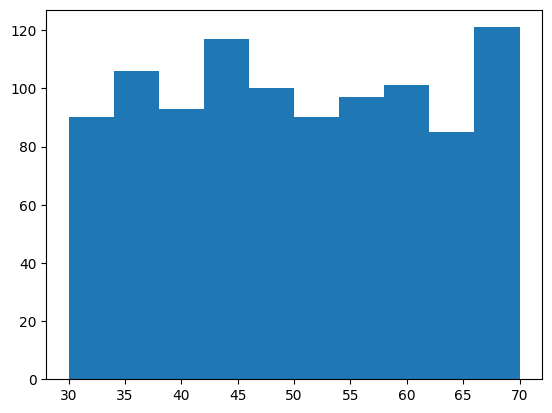

In [ ]:
# Visualizando graficamente a distribuição de dados
plt.hist(df_pacientes['Idade'])


<Figure size 600x400 with 0 Axes>

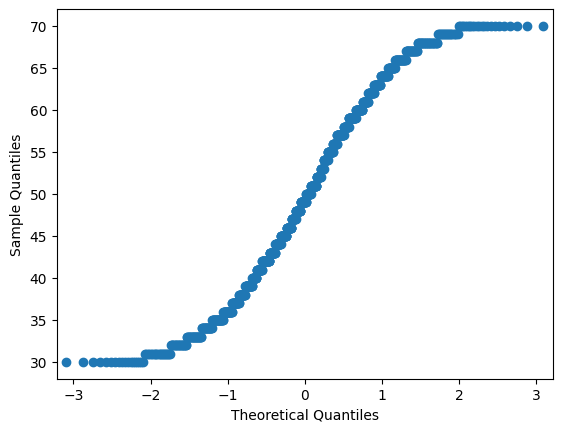

In [ ]:
# Testando a normalidade da distribuição das idades na população através do gráfico Q-Q PLOT

plt.figure(figsize=(6, 4))
sm.qqplot(df_pacientes['Idade'])
plt.show()

In [ ]:
print ('Podemos confirmar que os dados de idade dos pacientes não seguem uma distribuição normal')

Podemos confirmar que os dados de idade dos pacientes não seguem uma distribuição normal


In [ ]:
# Testando a normalidade da distribuição dos dados da amostra utilizando o Teste KS

# H0: A distribuição é normal
# H1: A distribuição não é normal
stat, p_valor = stats.kstest(df_amostra['Idade'],cdf='norm')

In [ ]:
print ('Estatítica do teste:', stat)
print('P valor:', p_valor)

Estatítica do teste: 1.0
P valor: 0.0


In [ ]:
if p_valor < alpha:
  print('Rejeitamos a hipótese nula. De modo a assumir que a distribuição dos dados não segue uma distribuição normal')
else:
  print('Não rejeitamos a hipótese nula. De modo a assumir que a distribuição dos dados segue uma distribuição normal')

Rejeitamos a hipótese nula. De modo a assumir que a distribuição dos dados não segue uma distribuição normal


(array([1., 6., 7., 2., 6., 3., 6., 4., 4., 5.]),
 array([30., 34., 38., 42., 46., 50., 54., 58., 62., 66., 70.]),
 <BarContainer object of 10 artists>)

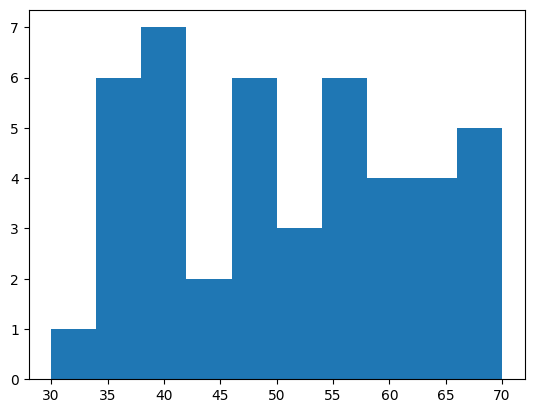

In [ ]:
plt.hist(df_amostra['Idade'])

In [ ]:
n_amostra = 45
alpha = 0.05
media_idade_populacao_cardiaca = df_pacientes_cardiaco['Idade'].mean()
media_idade_amostra_cardiaca = df_amostra_cardiaco['Idade'].mean()
z = stats.norm.ppf(1-alpha/2)

print('Tamanho da amostra:', n_amostra)
print('Média de idade da populacao:', media_idade_populacao_cardiaca)
print('Média de idade da amostra:', media_idade_amostra_cardiaca)
print('Z:', z)

Tamanho da amostra: 45
Média de idade da populacao: 49.831372549019605
Média de idade da amostra: 48.1578947368421
Z: 1.959963984540054


H0: A idade média das pessoas com problemas cardíacos é maior igual que 50 anos

H1: A idade média das pessoas com problemas cardíacos é menor que 50 anos


Considerando que os dados não seguem uma distribuição normal seria portanto desaconselhável usar testes estatísticos paramétricos, pois esses testes assumem a normalidade dos dados, e ao quebrar a regra deveríamos utilizar um teste não-paramétrico.

No entanto, como estamos tratando de dados fictícios e uma amostra pequena utilizeramos um teste t uniparamétrico, de modo a comparar a média amostral à média hipotética de 50 anos.

In [ ]:
# Calculando a estatística de teste e o valor p
t_stat, p_valor = ttest_1samp(df_amostra['Idade'], 50)

print("Valor estatística de teste", t_stat)
print("Valor p:", p_valor)

Valor estatística de teste 0.17113706058137004
Valor p: 0.8649187935739622


Para o caso de teste unicaudal utilizando a função **ttest_1samp** deve-se dividir o p_valor / 2

In [ ]:
if p_valor/2 < alpha:
  print('Rejeitamos a hipótese nual, assumimos que a idade média das pessoas com problemas cardíacos é menor que 50 anos.')
else:
  print('Não rejeitamos a hipótese nula, assumimos que a idade média das pessoas com problemas cardíacos é maior ou igual a 50 anos.')

Não rejeitamos a hipótese nula, assumimos que a idade média das pessoas com problemas cardíacos é maior ou igual a 50 anos.


## Questão 4:

Queremos entender que tipo de amostra estamos lidando se dividirmos os conjuntos em 2, sendo um com pessoas que têm condições de saúde adicionais e o outro com pessoas saudáveis. Seria dependente ou independente?

In [ ]:
df_pacientes_cardiaco = df_pacientes[df_pacientes['Estado_Saude'] == 1]
df_pacientes_cardiaco

,Index,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais
6,6,150.750643,52,1,2,1,Feminino,Hispânico,Com condições de saúde adicionais
...,...,...,...,...,...,...,...,...,...
992,992,156.381847,69,0,0,1,Masculino,Caucasiano,Com condições de saúde adicionais
993,993,152.152123,41,0,0,1,Masculino,Caucasiano,Com condições de saúde adicionais
994,994,147.660039,49,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
995,995,136.381404,58,1,0,1,Feminino,Caucasiano,Com condições de saúde adicionais


In [ ]:
df_pacientes_nao_cardiaco = df_pacientes[df_pacientes['Estado_Saude'] == 0]
df_pacientes_nao_cardiaco

,Index,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
5,5,153.134713,66,0,0,0,Masculino,Caucasiano,Saudável
7,7,142.339147,63,0,3,0,Masculino,Asiático,Saudável
9,9,135.927802,40,0,2,0,Masculino,Hispânico,Saudável
10,10,161.863980,43,1,3,0,Feminino,Asiático,Saudável
...,...,...,...,...,...,...,...,...,...
986,986,134.647022,46,1,1,0,Feminino,Afro-americano,Saudável
989,989,159.016471,63,0,0,0,Masculino,Caucasiano,Saudável
997,997,134.390624,70,0,0,0,Masculino,Caucasiano,Saudável
998,998,160.818609,33,1,0,0,Feminino,Caucasiano,Saudável


In [ ]:
df_pacientes_cardiaco[['Pressao_Arterial','Idade']].describe()

,Pressao_Arterial,Idade
count,510.000000,510.000000
mean,150.118452,49.831373
std,10.330733,11.939558
min,112.929821,30.000000
25%,143.204099,39.250000
50%,150.130652,49.000000
75%,156.765943,60.000000
max,179.570655,70.000000


In [ ]:
df_pacientes_nao_cardiaco[['Pressao_Arterial','Idade']].describe()

,Pressao_Arterial,Idade
count,490.000000,490.000000
mean,150.643290,49.679592
std,9.527185,11.421529
min,113.712277,30.000000
25%,144.827983,40.000000
50%,150.787827,49.000000
75%,156.830693,59.000000
max,181.803131,70.000000


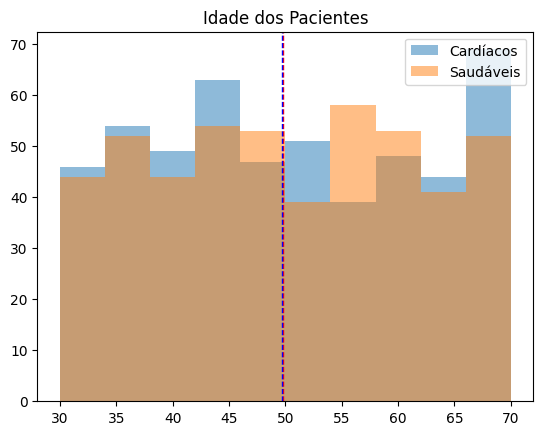

In [ ]:
# Plotando os dados - Referente à Idade
plt.hist(df_pacientes_cardiaco['Idade'], alpha=0.5, label='Cardíacos')
plt.hist(df_pacientes_nao_cardiaco['Idade'], alpha=0.5, label='Saudáveis')
plt.axvline(df_pacientes_cardiaco['Idade'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df_pacientes_nao_cardiaco['Idade'].mean(), color='b', linestyle='dashed', linewidth=1)
plt.title('Idade dos Pacientes')
plt.legend(loc='upper right')
plt.show()

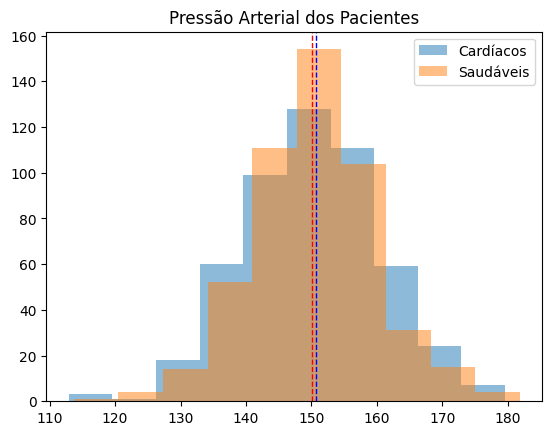

In [ ]:
# Plotando os dados - Referente à Pressão Arterial
plt.hist(df_pacientes_cardiaco['Pressao_Arterial'], alpha=0.5, label='Cardíacos')
plt.hist(df_pacientes_nao_cardiaco['Pressao_Arterial'], alpha=0.5, label='Saudáveis')
plt.axvline(df_pacientes_cardiaco['Pressao_Arterial'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df_pacientes_nao_cardiaco['Pressao_Arterial'].mean(), color='b', linestyle='dashed', linewidth=1)
plt.title('Pressão Arterial dos Pacientes')
plt.legend(loc='upper right')
plt.show()

In [ ]:
df_pacientes_cardiaco[['Nome_Genero', 'Nome_Etnia']].describe(include='object')

,Nome_Genero,Nome_Etnia
count,510,510
unique,2,4
top,Feminino,Afro-americano
freq,257,138


In [ ]:
df_pacientes_nao_cardiaco[['Nome_Genero', 'Nome_Etnia']].describe(include='object')

,Nome_Genero,Nome_Etnia
count,490,490
unique,2,4
top,Feminino,Asiático
freq,246,128


In [ ]:
df_frequencia_genero_cardiaco = df_pacientes_cardiaco['Nome_Genero'].value_counts()
df_frequencia_genero_cardiaco

Nome_Genero
Feminino     257
Masculino    253
Name: count, dtype: int64

In [ ]:
df_frequencia_genero_nao_cardiaco = df_pacientes_nao_cardiaco['Nome_Genero'].value_counts()
df_frequencia_genero_nao_cardiaco

Nome_Genero
Feminino     246
Masculino    244
Name: count, dtype: int64

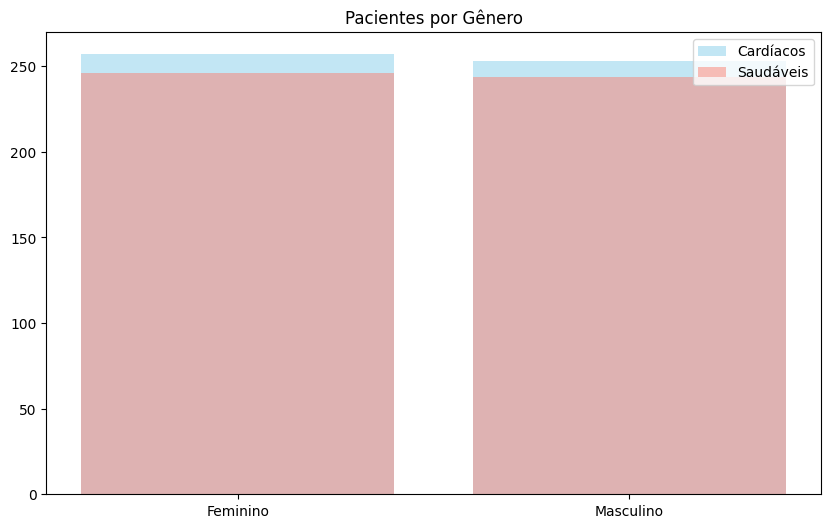

In [ ]:
# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))

plt.bar(df_frequencia_genero_cardiaco.index, df_frequencia_genero_cardiaco.values, color='skyblue', alpha=0.5, label='Cardíacos')
plt.bar(df_frequencia_genero_nao_cardiaco.index, df_frequencia_genero_nao_cardiaco.values, color='salmon', alpha=0.5, label='Saudáveis')
plt.title('Pacientes por Gênero')
plt.legend(loc='upper right')
plt.show()

In [ ]:
df_frequencia_etnia_cardiaco = df_pacientes_cardiaco['Nome_Etnia'].value_counts()
df_frequencia_etnia_cardiaco

Nome_Etnia
Afro-americano    138
Hispânico         128
Asiático          124
Caucasiano        120
Name: count, dtype: int64

In [ ]:
df_frequencia_etnia_nao_cardiaco = df_pacientes_nao_cardiaco['Nome_Etnia'].value_counts()
df_frequencia_etnia_nao_cardiaco

Nome_Etnia
Asiático          128
Hispânico         127
Afro-americano    122
Caucasiano        113
Name: count, dtype: int64

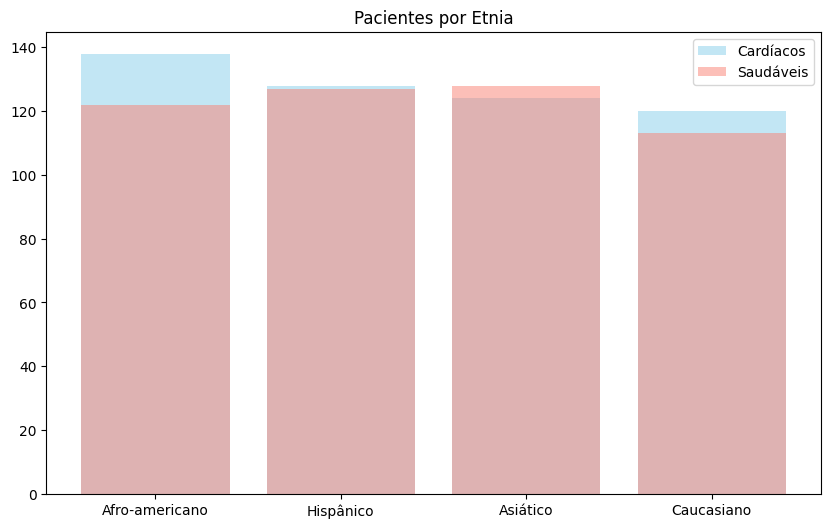

In [ ]:
# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))

plt.bar(df_frequencia_etnia_cardiaco.index, df_frequencia_etnia_cardiaco.values, color='skyblue', alpha=0.5, label='Cardíacos')
plt.bar(df_frequencia_etnia_nao_cardiaco.index, df_frequencia_etnia_nao_cardiaco.values, color='salmon', alpha=0.5, label='Saudáveis')
plt.title('Pacientes por Etnia')
plt.legend(loc='upper right')
plt.show()

In [ ]:
print('Através da análise exploratória dos dados assumimos que se trata de amostras independentes, onde assumimos que o index dos dados analisados corresponde a um novo paciente,\n  tendo em vista que embora haja uma diferença sutil no quantitativo geral de registros entre cada amostra, há diferenças nas observações gêneros e etnia, por exemplo. ')

Através da análise exploratória dos dados assumimos que se trata de amostras independentes, onde assumimos que o index dos dados analisados corresponde a um novo paciente,
  tendo em vista que embora haja uma diferença sutil no quantitativo geral de registros entre cada amostra, há diferenças nas observações gêneros e etnia, por exemplo. 


## Questão 5:

Agora considere um conjunto de pessoas aleatória que representam o index do dataframe,  índices = ([690, 894,  67, 201, 364,  19,  60, 319, 588, 643, 855, 623, 530, 174, 105, 693,   6, 462, 973, 607, 811, 346, 354, 966, 943, 372]), podemos dizer que a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde? Considere o nível de significância a 6%.

H0: a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde

H1: a pressão arterial médias das duas amostras são diferentes

In [ ]:
lista_indices = [690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372]

In [ ]:
len(lista_indices)

26

In [ ]:
# Filtrando os dados pelo índices indicados
df_amostra = df_pacientes[df_pacientes['Index'].isin(lista_indices)]
df_amostra

,Index,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
6,6,150.750643,52,1,2,1,Feminino,Hispânico,Com condições de saúde adicionais
19,19,160.089332,38,1,1,0,Feminino,Afro-americano,Saudável
60,60,161.136755,35,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
67,67,158.427577,45,1,0,1,Feminino,Caucasiano,Com condições de saúde adicionais
105,105,151.920500,34,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
174,174,148.278546,32,1,1,0,Feminino,Afro-americano,Saudável
201,201,152.837941,64,0,1,0,Masculino,Afro-americano,Saudável
319,319,161.163704,52,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
346,346,164.313189,51,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
354,354,152.429706,57,1,1,0,Feminino,Afro-americano,Saudável


In [ ]:
df_amostra_cardiaco = df_amostra[df_amostra['Estado_Saude'] == 1]['Pressao_Arterial']
df_amostra_nao_cardiaco = df_amostra[df_amostra['Estado_Saude'] == 0]['Pressao_Arterial']

In [ ]:
media_cardiaco = df_amostra_cardiaco.mean()
media_saudavel = df_amostra_nao_cardiaco.mean()

print('Média pacientes cardíacos:', media_cardiaco)
print('Média pacientes saudáveis:',media_saudavel)

Média pacientes cardíacos: 153.1972544980592
Média pacientes saudáveis: 152.94305165531088


Consideramos que já vimos acima que a distribuição das pressões arteriais seguem uma distribuição normal e tratamos de uma amostra pequena
além das amostras serem independentes, testaremos a variabilidade entre as amostras, através do teste F de Levene, para sabermos o parâmetro correto para utilizaremos no teste T

H0: A variância da pressão arterial do paciente cardíaco é igual a variância da pressão arterial do paciente saudável

H1: As variâncias são diferentes

In [ ]:
stat, p_valor = levene(df_amostra_cardiaco,df_amostra_nao_cardiaco)

print('Estatística do teste:', stat)
print('P valor:',p_valor)

Estatística do teste: 0.4239567770128747
P valor: 0.521155378293372


In [ ]:
if p_valor < alpha:
  print('Rejeitamos a hipótese nula, assumimos que as variâncias são diferentes.')
else:
   print('Não rejeitamos a hipótese nula, assumimos que as variâncias são iguais.')

Não rejeitamos a hipótese nula, assumimos que as variâncias são iguais.


In [ ]:
# Calculando a estatística através do teste T indepedente considerando a
# independência das observações e assumindo igualdade de variâncias entre as
# duas amostras

alpha = 0.05
stat, p_valor_ttest = ttest_ind(df_amostra_cardiaco, df_amostra_nao_cardiaco, equal_var=True)
print('Estatística do teste:', stat)
print('P valor:',p_valor_ttest)

Estatística do teste: 0.08124024162327208
P valor: 0.9359246016248557


In [ ]:
if p_valor_ttest < alpha:
  print('Rejeitamos a hipótese nula, assumimos que a pressão arterial médias das duas amostras são diferentes.')
else:
   print('Não rejeitamos a hipótese nula, assumimos que a pressão arterial média para pacientes cardíacos é igual à pressão arterial média para pacientes saudáveis.')

Não rejeitamos a hipótese nula, assumimos que a pressão arterial média para pacientes cardíacos é igual à pressão arterial média para pacientes saudáveis.


## Questão 6:

Existe uma diferença significativa na pressão arterial média entre
diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%)

a. Hipótese Nula (H0): A pressão arterial média é a mesma em todos
os grupos étnicos.

b. Hipótese Alternativa (H1): Há uma diferença significativa na
pressão arterial média entre pelo menos dois grupos étnicos
nesta população.

In [ ]:
df_pacientes['Nome_Etnia'].unique()

array(['Afro-americano', 'Asiático', 'Hispânico', 'Caucasiano'],
      dtype=object)

In [ ]:
# Filtrando as amostras de pressões arteriais de acordo com cada grupo étnico
grupo_afro = df_pacientes[df_pacientes['Nome_Etnia'] == 'Afro-americano']['Pressao_Arterial']
grupo_asiatico = df_pacientes[df_pacientes['Nome_Etnia'] == 'Asiático']['Pressao_Arterial']
grupo_hispanico = df_pacientes[df_pacientes['Nome_Etnia'] == 'Hispânico']['Pressao_Arterial']
grupo_caucasiano = df_pacientes[df_pacientes['Nome_Etnia'] == 'Caucasiano']['Pressao_Arterial']

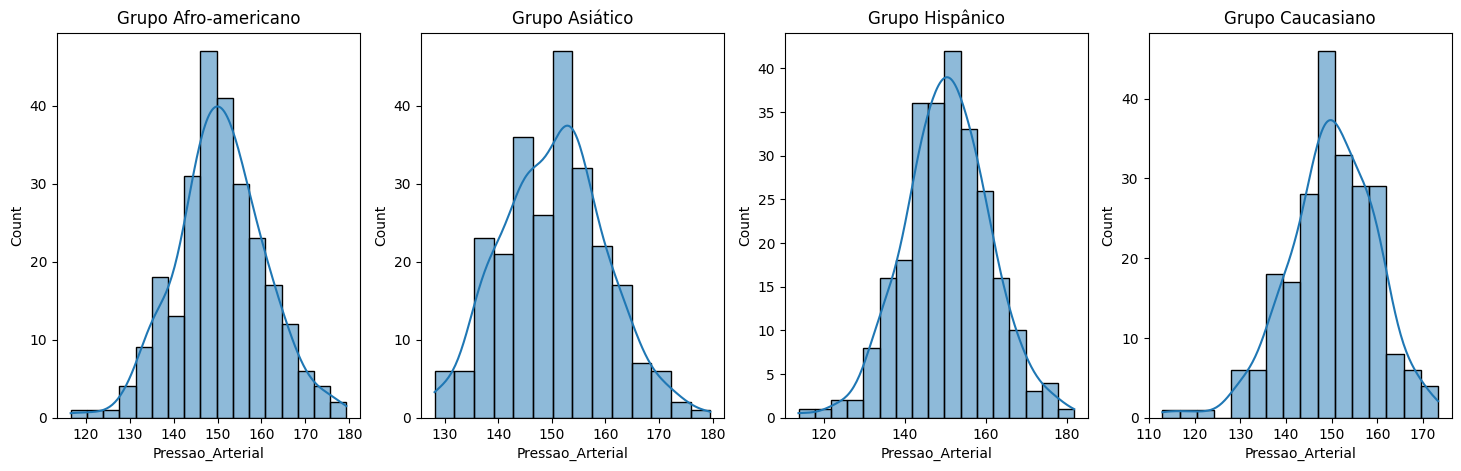

In [ ]:
# De modo a utilizarmos o modelo ANOVA precisamos atender as premissas de que as variáveis seguem uma distribuição normal e de que as variâncias são iguais

# Testando a premissa da normalidade das variáveis
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18, 5))

# Histogramas
sns.histplot(grupo_afro, ax=ax[0], kde=True)
ax[0].set_title('Grupo Afro-americano')

sns.histplot(grupo_asiatico, ax=ax[1], kde=True)
ax[1].set_title('Grupo Asiático')

sns.histplot(grupo_hispanico, ax=ax[2], kde=True)
ax[2].set_title('Grupo Hispânico')

sns.histplot(grupo_caucasiano, ax=ax[3], kde=True)
ax[3].set_title('Grupo Caucasiano')

plt.show()

Testando a premissa da homogeniedade das variâncias entre as amostras

H0: A variância da pressão arterial dos grupos são iguais

H1: As variâncias são diferentes

In [ ]:
stat, p_valor = levene(grupo_afro, grupo_asiatico, grupo_hispanico, grupo_caucasiano)

print('Estatística do teste:', stat)
print('P valor:',p_valor)

Estatística do teste: 0.6760233008629023
P valor: 0.5668166817544318


In [ ]:
if p_valor < alpha:
  print('Rejeitamos a hipótese nula, assumimos que as variâncias são diferentes.')
else:
   print('Não rejeitamos a hipótese nula, assumimos que as variâncias são iguais. ')

Não rejeitamos a hipótese nula, assumimos que as variâncias são iguais. 


In [ ]:
print('Tendo atendido duas das principais premissas para utilização da ANOVA, além da pressão arterial ser uma variável contínua\n e as observações serem independentes entre os grupos, realizaremos o teste ANOVA')

Tendo atendido duas das principais premissas para utilização da ANOVA, além da pressão arterial ser uma variável contínua
 e as observações serem independentes entre os grupos, realizaremos o teste ANOVA


In [ ]:
# Aplicando a ANOVA
alpha=0.05

#import scipy.stats as stats
stat, p_valor_anova = stats.f_oneway(grupo_afro, grupo_asiatico, grupo_hispanico, grupo_caucasiano)

print('Estatística do teste:', stat)
print('P valor:',p_valor_anova)

Estatística do teste: 0.23245296261596837
P valor: 0.873800123850745


In [ ]:
if p_valor_anova < alpha:
  print('Rejeitamos a hipótese nula, assumimos que há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.')
else:
   print('Não rejeitamos a hipótese nula, assumimos que a pressão arterial média é a mesma em todos os grupos étnicos.')

Não rejeitamos a hipótese nula, assumimos que a pressão arterial média é a mesma em todos os grupos étnicos.


In [ ]:
# Exibindo a tabela ANOVA para melhor interpretar os dados
model_1fator = ols('Pressao_Arterial ~ Nome_Etnia', df_pacientes).fit()
anova_tabela = sm.stats.anova_lm(model_1fator,typ=2)
anova_tabela

,sum_sq,df,F,PR(>F)
Nome_Etnia,69.110958,3.0,0.232453,0.8738
Residual,98707.444779,996.0,NaN,NaN


In [ ]:
print('A tabela confirma que não há evidências suficientes para rejeitar a hipótese nula e nos mostra a baixa variação entre os grupos étnicos.')

A tabela confirma que não há evidências suficientes para rejeitar a hipótese nula e nos mostra a baixa variação entre os grupos étnicos.


Ainda, a hipótese alternativa proposta pela questão assume que há uma diferença significativa na
pressão arterial média entre pelo menos dois grupos étnicos
nesta população. No entanto, considerando que a ANOVA de um fator permite apenas determinar se há uma diferença estatisticamente significativa entre as médias de pelo menos dois grupos independentes.

Assim, se caso houvesse diferença significativa entre os grupos, para sabermos quais grupos diferem entre si, se faz necessário utilizar um teste de comparações múltiplas, a exemplo do teste de Tukey, considerando que os dados atendem os pressupostos para a utilização do teste: os grupos são normalmente distribuídos, as variâncias são constantes e as observações são independentes.

a. Hipótese Nula (H0): Não há diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.

b. Hipótese Alternativa (H1): Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.

In [ ]:
# Em caso de utilizar o teste Tukey

# Concatenando os grupos e seus valores respectivos em um único dataframe, resetando o índice e descartando o índice antigo
df_grupos = pd.DataFrame({'Grupo':['Afro'] * len(grupo_afro) + ['Asia'] * len(grupo_asiatico) + ['Hisp'] * len(grupo_hispanico) + ['Cauc'] * len(grupo_caucasiano),
                              'Pressao': pd.concat([grupo_afro, grupo_asiatico, grupo_hispanico, grupo_caucasiano])}).reset_index(drop=True)

In [ ]:
df_grupos.head()

,Grupo,Pressao
0,Afro,142.755809
1,Afro,161.878468
2,Afro,136.130824
3,Afro,138.189136
4,Afro,138.546769


In [ ]:
# Realizando o teste de Tukey

tukey = pairwise_tukeyhsd(df_grupos['Pressao'], df_grupos['Grupo'], alpha=alpha)
print("Teste de Tukey:")
print(tukey)

Teste de Tukey:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  Afro   Asia  -0.3967 0.9695 -2.6613  1.868  False
  Afro   Cauc  -0.7445 0.8407 -3.0555 1.5665  False
  Afro   Hisp  -0.3079 0.9852 -2.5657   1.95  False
  Asia   Cauc  -0.3479 0.9807 -2.6762 1.9805  False
  Asia   Hisp   0.0888 0.9996 -2.1867 2.3643  False
  Cauc   Hisp   0.4367 0.9627 -1.8851 2.7584  False
---------------------------------------------------


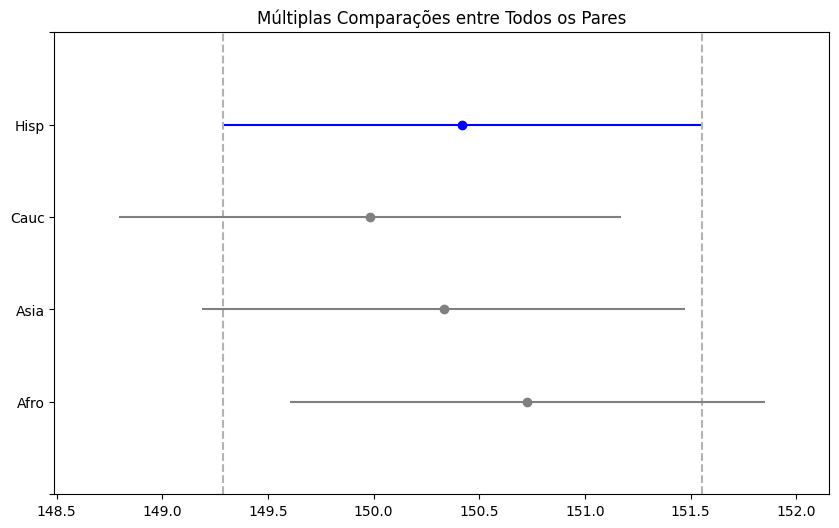

In [ ]:
# Análise gráfica dos resultados
# O comparison_name colore em vermelho os grupos que apresentam diferença significativas e em cinza/azul os que apresentam similaridade estatística
tukey.plot_simultaneous(comparison_name='Hisp')
plt.title('Múltiplas Comparações entre Todos os Pares')
plt.show()

Observamos que o p_valor de todos os pares de grupos é maior que alpha (0.05), momento em que não rejeitamos a hipótese nula.

Na tabela ao analisarmos o intervalo de confiança (lower-upper) para as diferença entre os pares de grupos, podemos observar que o valor 0 está contido em todos eles, concluindo que a pressão arterial média dos pacientes dos diferentes pares de grupos são significativamente as mesmas. Além de graficamente visualizarmos que os intervalos de confiança dos grupos se sobrepõem, indicando similaridade estatística entre os grupos.

## Questão 7:

Lúcia é uma pesquisadora e tem o objetivo de entender a relação de gênero neste grupo de pacientes. Acredita-se que há uma relação entre o sexo e condições de saúde adicionais. (Teste qui-quadrado)

HO: Não há uma associação entre o genêro e condições de saúde adicionais

H1: Há uma relação entre as variáveis

In [ ]:
tabela_contigencia = pd.crosstab(df_pacientes['Nome_Genero'],df_pacientes['Estado_Saude'])
tabela_contigencia.columns=['Cardiaco','Saudavel']
tabela_contigencia

,Cardiaco,Saudavel
Nome_Genero,,
Feminino,246,257
Masculino,244,253


<Axes: ylabel='Nome_Genero'>

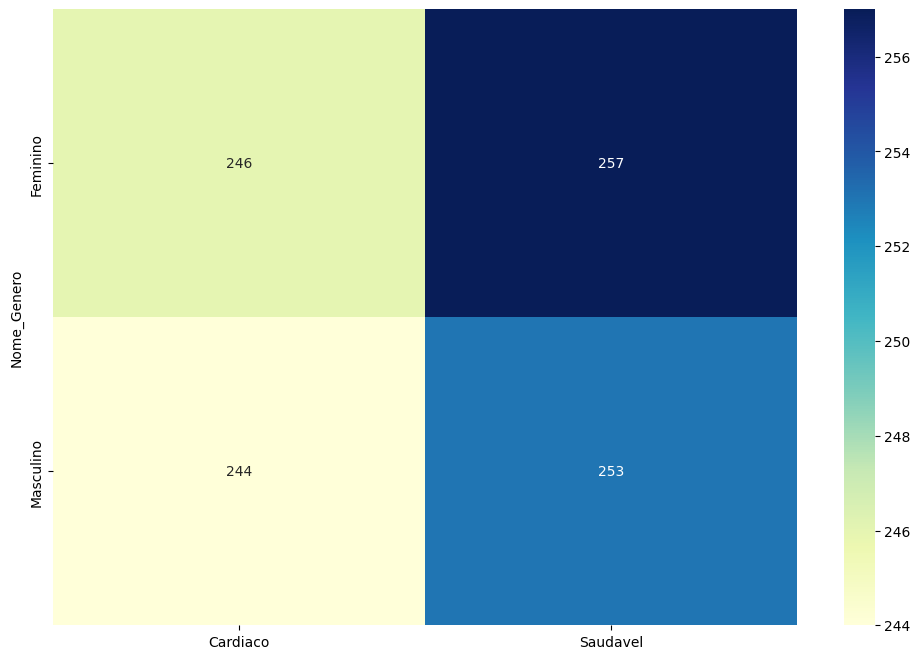

In [ ]:
plt.figure(figsize=(12,8))
x_axis_labels = ['Cardiaco', 'Saudavel']
y_axis_labels = ['Feminino', 'Masculino']
sns.heatmap(tabela_contigencia, annot=True, cmap="YlGnBu", fmt='d',xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [ ]:
# Convertendo o Dataframe em uma lista para parametro da função chi2_contingency()
table = tabela_contigencia.values.tolist()

# Realizando o teste de hipótese utilizando a função chi2_contingency()
stat, p_valor, df, expected = chi2_contingency(table)

print('Estatística de Teste:', stat)
print('P valor:', p_valor)

if p_valor <= alpha:
    print('Rejeitamos a hipótese nula. Há uma associação significativa entre as variáveis genêro e condições de saúde adicionais.')
else:
    print('Não rejeitamos a hipótese nula. Não existe uma associação significativa entre as variáveis genêro e condições de saúde adicionais.')

Estatística de Teste: 0.0
P valor: 1.0
Não rejeitamos a hipótese nula. Não existe uma associação significativa entre as variáveis genêro e condições de saúde adicionais.


# Questão 8:

Existe uma associação entre a idade dos pacientes e sua pressão
arterial?

Hipótese Nula (H0): A idade dos pacientes é independente da
pressão arterial.

Hipótese Alternativa (H1): A idade dos pacientes está associada à
sua pressão arterial.

In [ ]:
df_pacientes.describe()

,Index,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,150.375623,49.757000,0.503000,1.526000,0.51000
std,288.819436,9.943613,11.682998,0.500241,1.104783,0.50015
min,0.000000,112.929821,30.000000,0.000000,0.000000,0.00000
25%,249.750000,144.240948,40.000000,0.000000,1.000000,0.00000
50%,499.500000,150.455624,49.000000,1.000000,2.000000,1.00000
75%,749.250000,156.792113,60.000000,1.000000,3.000000,1.00000
max,999.000000,181.803131,70.000000,1.000000,3.000000,1.00000


In [ ]:
# Copiando as variáveis necessárias à análise da correlação
df_pressao_idade = df_pacientes[['Idade', 'Pressao_Arterial']].copy()
df_pressao_idade

,Idade,Pressao_Arterial
0,31,142.755809
1,35,161.878468
2,39,161.508259
3,43,144.979408
4,55,162.502954
...,...,...
995,58,136.381404
996,41,161.801012
997,70,134.390624
998,33,160.818609


In [ ]:
# Considerando que o paciente mais jovem tem 30 anos e o mais velho 70 anos, podemos categorizar entre Adultos e Idosos
faixas_etarias = [18,25,60,120]
rotulos_faixas = ['Jovem','Adulto','Idoso']

# right=False inclui o limite inferior do intervalo e exclui o limite superior
df_pressao_idade['Faixa_etaria'] = pd.cut(df_pressao_idade['Idade'], bins=faixas_etarias, labels=rotulos_faixas, right=False)


In [ ]:
# Considerando padrões semelhantes ao definidos pela OMS, a função define se o paciente possui pressão arterial:

# Para adultos:
# Normal: Sistólica < 120 mmHg
# Pré-hipertensão: 120 ≤ Sistólica ≤ 139 mmHg
# Hipertensão: Sistólica ≥ 140 mmHg

faixas_pressoes= [0,120,140,200]
rotulos_pressoes = ['Normal','Pré-hipertenso','Hipertenso']

df_pressao_idade['Pressao'] = pd.cut(df_pressao_idade['Pressao_Arterial'], bins=faixas_pressoes, labels=rotulos_pressoes, right=False)

In [ ]:
df_pressao_idade

,Idade,Pressao_Arterial,Faixa_etaria,Pressao
0,31,142.755809,Adulto,Hipertenso
1,35,161.878468,Adulto,Hipertenso
2,39,161.508259,Adulto,Hipertenso
3,43,144.979408,Adulto,Hipertenso
4,55,162.502954,Adulto,Hipertenso
...,...,...,...,...
995,58,136.381404,Adulto,Pré-hipertenso
996,41,161.801012,Adulto,Hipertenso
997,70,134.390624,Idoso,Pré-hipertenso
998,33,160.818609,Adulto,Hipertenso


In [ ]:
tabela_contigencia = pd.crosstab(df_pressao_idade['Faixa_etaria'],df_pressao_idade['Pressao'])
tabela_contigencia

Pressao,Normal,Pré-hipertenso,Hipertenso
Faixa_etaria,,,
Adulto,3,96,646
Idoso,1,45,209


<Axes: xlabel='Pressao', ylabel='Faixa_etaria'>

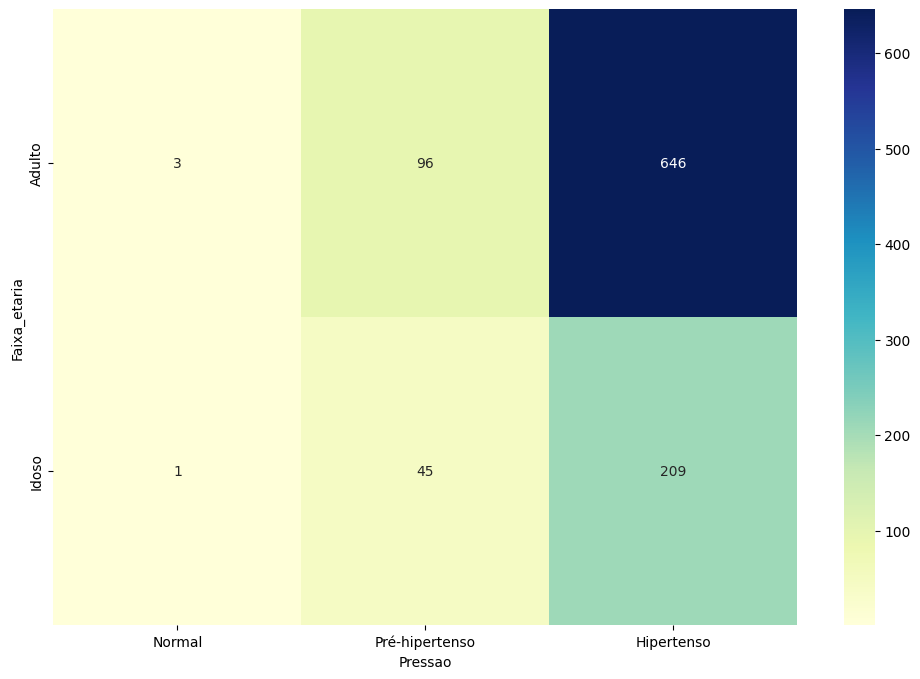

In [ ]:
plt.figure(figsize=(12,8))
x_axis_labels = ['Normal', 'Pré-hipertenso', 'Hipertenso']
y_axis_labels = ['Adulto', 'Idoso']
sns.heatmap(tabela_contigencia, annot=True, cmap="YlGnBu", fmt='d',xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [ ]:
# Convertendo o Dataframe em uma lista para parametro da função chi2_contingency()
table = tabela_contigencia.values.tolist()

# Realizando o teste de hipótese utilizando a função chi2_contingency()
stat, p_valor, df, expected = chi2_contingency(table)

alpha = 0.05

print('Estatística de Teste:', stat)
print('P valor:', p_valor)

if p_valor <= alpha:
    print('Rejeitamos a hipótese nula. A idade dos pacientes está associada à sua pressão arterial')
else:
    print('Não rejeitamos a hipótese nula. Não existe uma associação significativa entre a idade do paciente e sua pressão arterial.')

Estatística de Teste: 3.5562101147438536
P valor: 0.16895800984747822
Não rejeitamos a hipótese nula. Não existe uma associação significativa entre a idade do paciente e sua pressão arterial.


## Questão 9:

Qual é o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais? (nível de confiança 95%)

In [ ]:
df_amostra_cardiaco = df_pacientes[df_pacientes['Estado_Saude'] == 1]
media_pa_cardiaco = df_amostra_cardiaco['Pressao_Arterial'].mean()
std_amostra = df_amostra_cardiaco['Pressao_Arterial'].std()
n = len(df_amostra_cardiaco)

print ('Média da PA da amostra:', media_pa_cardiaco)
print ('Desvio Padrão da amostra:', std_amostra)
print ('Tamanho da amostra:', n)

Média da PA da amostra: 150.11845194515755
Desvio Padrão da amostra: 10.330732706372975
Tamanho da amostra: 510


In [ ]:
# Calcula o valor crítico da distribuição Z (normal) para um nível de confiança de 95%
alpha = 0.05
x_critico = stats.norm.ppf(1-alpha/2)

# Calcula a margem de erro e o intervalo de confiança para a média
me = x_critico * (std_amostra / np.sqrt(n))
intervalo_confianca = (media_pa_cardiaco - me, media_pa_cardiaco + me)

print(f"O intervalo de confiança para a média das pressões arterias entre os pacientes com condições de saúde adicionais está entre: {intervalo_confianca}")

O intervalo de confiança para a média das pressões arterias entre os pacientes com condições de saúde adicionais está entre: (149.22186145551754, 151.01504243479755)


## Questão 10:

A distribuição da pressão arterial na população segue uma distribuição normal?

Hipótese Nula (H0): A distribuição da pressão arterial na população segue uma distribuição normal.

Hipótese Alternativa (H1): A distribuição da pressão arterial na população não segue uma distribuição normal.


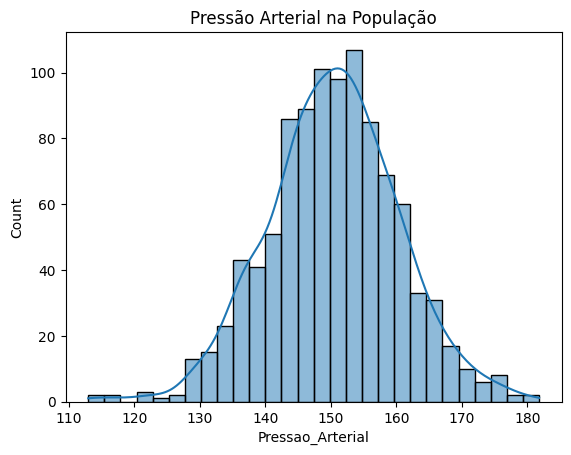

In [ ]:
# Testando a normalidade através do histograma

# Histograma
sns.histplot(df_pacientes['Pressao_Arterial'], kde=True).set_title('Pressão Arterial na População')

plt.show()

<Figure size 600x400 with 0 Axes>

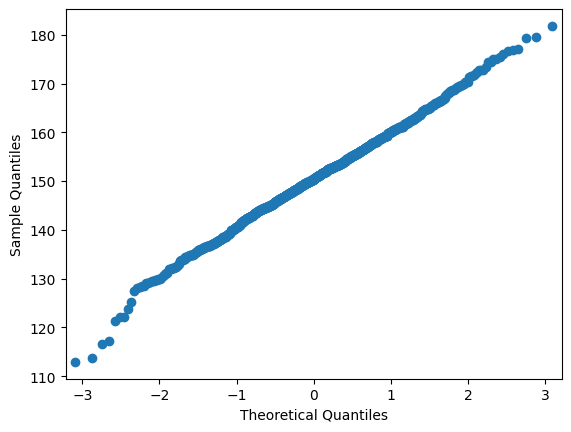

In [ ]:
# Testando a normalidade da distribuição das pressões arteriais na população através do gráfico Q-Q PLOT

plt.figure(figsize=(6, 4))
sm.qqplot(df_pacientes['Pressao_Arterial'])
plt.show()

In [ ]:
print('Através das análises gráficas é possível assumir que os valores das pressões arteriais da população seguem uma distribuição normal.')

Através das análises gráficas é possível assumir que os valores das pressões arteriais da população seguem uma distribuição normal.
